In [141]:
import py_wake
from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80, wt_x, wt_y, wt16_x, wt16_y
from py_wake import NOJ
from py_wake.site import UniformWeibullSite
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'AEP vs wind direction')

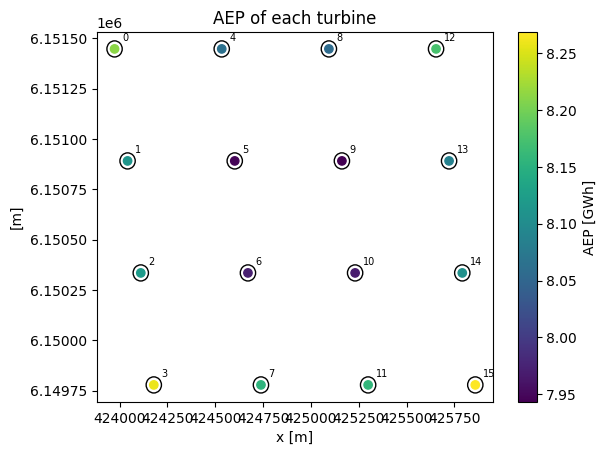

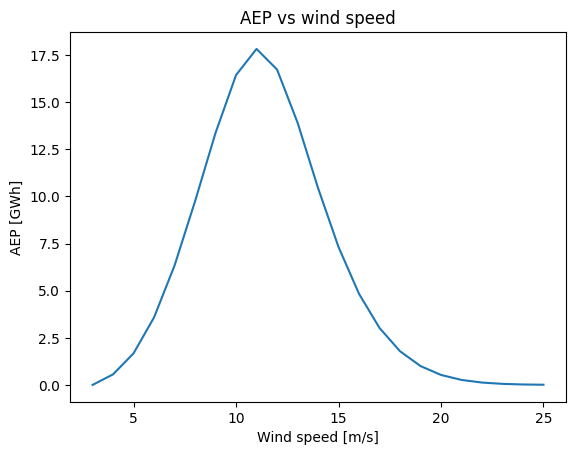

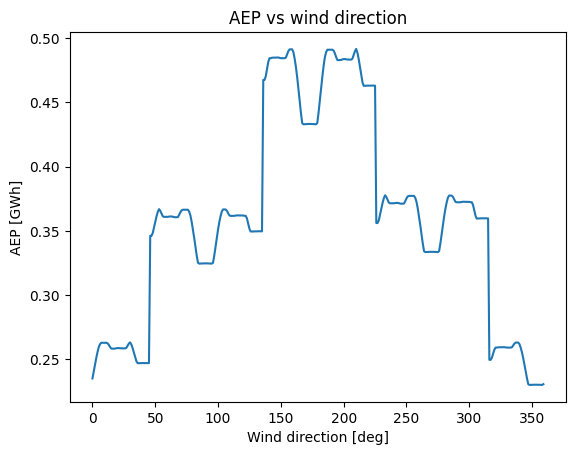

In [142]:
windTurbines = V80()
site = UniformWeibullSite(p_wd = [.20,.25,.35,.25],                         # sector frequencies
                          a = [9.176929,  9.782334,  9.531809,  9.909545],  # Weibull scale parameter
                          k = [2.392578, 2.447266, 2.412109, 2.591797],     # Weibull shape parameter
                          ti = 0.9                                          # turbulence intensity, optional
                         )
noj = NOJ(site,windTurbines)

simulationResult = noj(wt16_x,wt16_y)

plt.figure()
aep = simulationResult.aep()
windTurbines.plot(wt16_x,wt16_y)
c =plt.scatter(wt16_x, wt16_y, c=aep.sum(['wd','ws']))
plt.colorbar(c, label='AEP [GWh]')
plt.title('AEP of each turbine')
plt.xlabel('x [m]')
plt.ylabel('[m]')

plt.figure()
aep.sum(['wt','wd']).plot()
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind speed')

plt.figure()
aep.sum(['wt','ws']).plot()
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP [GWh]")
plt.title('AEP vs wind direction')

Text(0.5, 1.0, 'Wake map for 10 m/s and 270 deg')

<Figure size 640x480 with 0 Axes>

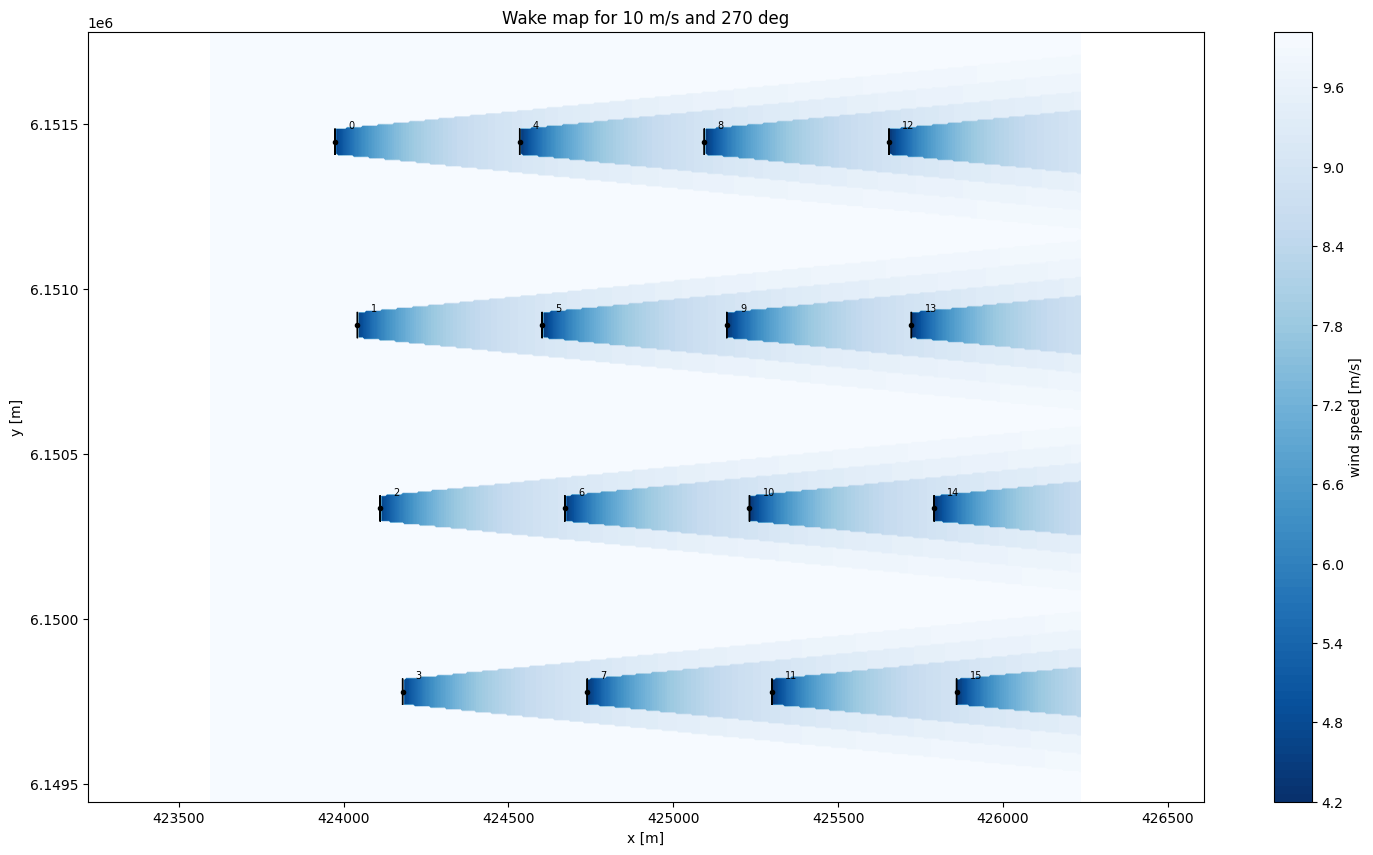

In [143]:
wind_speed = 10
wind_direction = 270

plt.figure()
flow_map = simulationResult.flow_map(ws=wind_speed, wd=wind_direction)
plt.figure(figsize=(18,10))
flow_map.plot_wake_map()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('Wake map for' + f' {wind_speed} m/s and {wind_direction} deg')

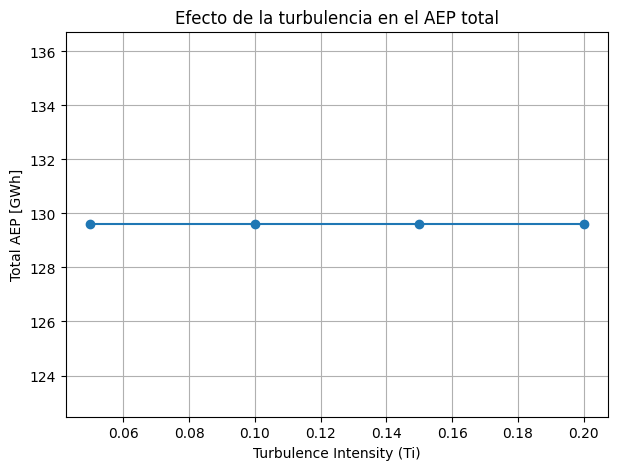

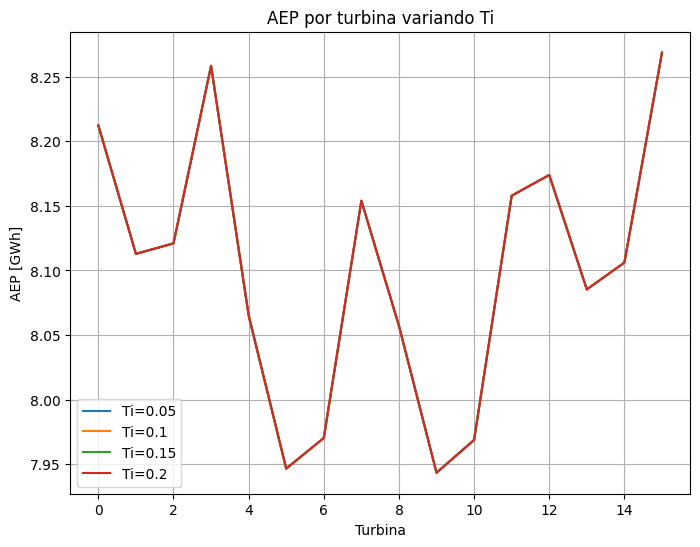

In [144]:
import matplotlib.pyplot as plt
from py_wake.examples.data.hornsrev1 import V80
from py_wake.site._site import UniformWeibullSite
from py_wake.deficit_models.noj import NOJ

# Coordenadas de tus turbinas (asegúrate de definir wt16_x y wt16_y)
# wt16_x, wt16_y = ...

windTurbines = V80()

# Diferentes valores de turbulencia a probar
ti_values = [0.05, 0.1, 0.15, 0.2]

results = {}

for ti in ti_values:
    site = UniformWeibullSite(
        p_wd = [.20,.25,.35,.25],                         
        a = [9.176929,  9.782334,  9.531809,  9.909545],  
        k = [2.392578, 2.447266, 2.412109, 2.591797],     
        ti = ti
    )
    noj = NOJ(site, windTurbines)
    sim = noj(wt16_x, wt16_y)
    results[ti] = sim.aep()  # guardamos el resultado de AEP

# --- Visualización ---

# Comparar AEP total según el ti
plt.figure(figsize=(7,5))
total_aep = [results[ti].sum().item() for ti in ti_values]
plt.plot(ti_values, total_aep, marker='o')
plt.xlabel("Turbulence Intensity (Ti)")
plt.ylabel("Total AEP [GWh]")
plt.title("Efecto de la turbulencia en el AEP total")
plt.grid(True)

# Comparar distribución de AEP por turbina para cada ti
plt.figure(figsize=(8,6))
for ti in ti_values:
    plt.plot(results[ti].sum(['wd','ws']), label=f"Ti={ti}")
plt.xlabel("Turbina")
plt.ylabel("AEP [GWh]")
plt.title("AEP por turbina variando Ti")
plt.legend()
plt.grid(True)

plt.show()


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. F

Totales NOJ [GWh]: [129.6018 129.6018 129.6018 129.6018 129.6018 129.6018]
Cambio % NOJ vs baseline: [0. 0. 0. 0. 0. 0.]
Totales Gaussian [GWh]: [127.4574 127.4574 127.4574 127.4574 127.4574 127.4574]
Cambio % Gaussian vs baseline: [0. 0. 0. 0. 0. 0.]

Max change NOJ (abs %): 0.0
Max change Gaussian (abs %): 0.0


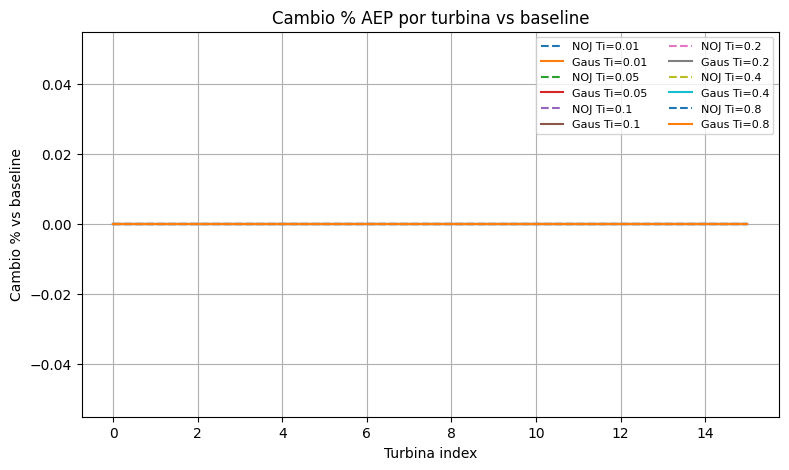

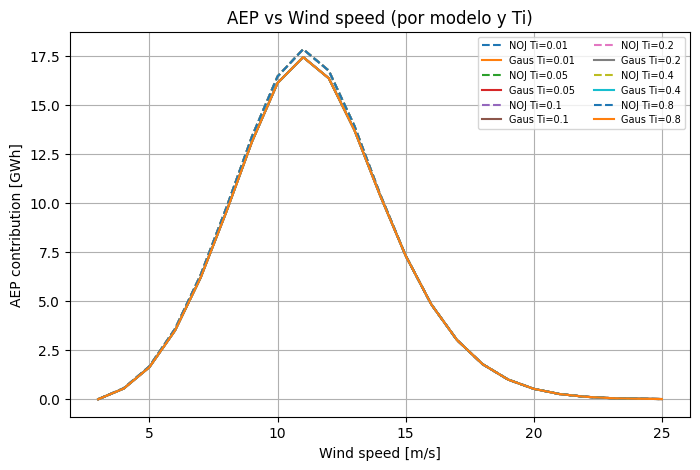

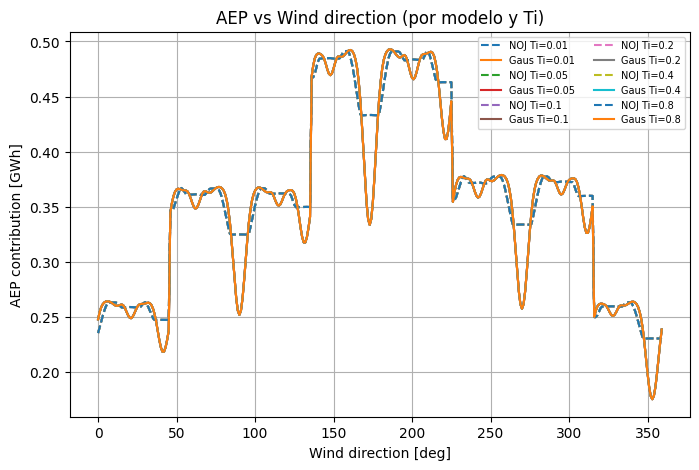

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.examples.data.hornsrev1 import V80
from py_wake.site._site import UniformWeibullSite
from py_wake.deficit_models.noj import NOJ
from py_wake.deficit_models.gaussian import BastankhahGaussian

windTurbines = V80()
ti_values = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]  # amplia el rango, incluye extremos
results_noj = {}
results_gauss = {}

for ti in ti_values:
    site = UniformWeibullSite(
        p_wd = [.20,.25,.35,.25],
        a = [9.176929,  9.782334,  9.531809,  9.909545],
        k = [2.392578, 2.447266, 2.412109, 2.591797],
        ti = ti
    )
    noj = NOJ(site, windTurbines)
    sim_noj = noj(wt16_x, wt16_y)
    results_noj[ti] = sim_noj

    gauss = BastankhahGaussian(site, windTurbines)
    sim_gauss = gauss(wt16_x, wt16_y)
    results_gauss[ti] = sim_gauss

# --- Totales y porcentajes ---
tot_noj = np.array([results_noj[ti].aep().sum().item() for ti in ti_values])
tot_gauss = np.array([results_gauss[ti].aep().sum().item() for ti in ti_values])

# Baseline = primer valor
base_noj = tot_noj[0]
base_gauss = tot_gauss[0]

pct_noj = 100 * (tot_noj - base_noj) / base_noj
pct_gauss = 100 * (tot_gauss - base_gauss) / base_gauss

print("Totales NOJ [GWh]:", np.round(tot_noj,4))
print("Cambio % NOJ vs baseline:", np.round(pct_noj,5))
print("Totales Gaussian [GWh]:", np.round(tot_gauss,4))
print("Cambio % Gaussian vs baseline:", np.round(pct_gauss,5))
print()
print("Max change NOJ (abs %):", np.round(np.max(np.abs(pct_noj)),6))
print("Max change Gaussian (abs %):", np.round(np.max(np.abs(pct_gauss)),6))

# --- Cambios por turbina (porcentaje) respecto baseline ---
# usamos sum(['wd','ws']) para colapsar y obtener vector por turbina
baseline_noj_per_t = results_noj[ti_values[0]].aep().sum(['wd','ws']).values
baseline_gauss_per_t = results_gauss[ti_values[0]].aep().sum(['wd','ws']).values

plt.figure(figsize=(9,5))
for ti in ti_values:
    v_noj = results_noj[ti].aep().sum(['wd','ws']).values
    v_gauss = results_gauss[ti].aep().sum(['wd','ws']).values
    pct_t_noj = 100*(v_noj - baseline_noj_per_t)/baseline_noj_per_t
    pct_t_gauss = 100*(v_gauss - baseline_gauss_per_t)/baseline_gauss_per_t
    plt.plot(pct_t_noj, "--", label=f"NOJ Ti={ti}")
    plt.plot(pct_t_gauss, "-", label=f"Gaus Ti={ti}")
plt.xlabel("Turbina index")
plt.ylabel("Cambio % vs baseline")
plt.title("Cambio % AEP por turbina vs baseline")
plt.legend(ncol=2, fontsize=8)
plt.grid(True)

# --- AEP vs wind speed (sum over wd) ---
plt.figure(figsize=(8,5))
for ti in ti_values:
    aep_noj_ws = results_noj[ti].aep().sum(['wt','wd'])  # indexed by ws
    aep_gauss_ws = results_gauss[ti].aep().sum(['wt','wd'])
    # convierto a numpy para plotear; x = aep_noj_ws.ws (si existe) o rango
    ws_axis = aep_noj_ws.ws.values if hasattr(aep_noj_ws, 'ws') else np.arange(aep_noj_ws.shape[0])
    plt.plot(ws_axis, aep_noj_ws, "--", label=f"NOJ Ti={ti}")
    plt.plot(ws_axis, aep_gauss_ws, "-", label=f"Gaus Ti={ti}")
plt.xlabel("Wind speed [m/s]")
plt.ylabel("AEP contribution [GWh]")
plt.title("AEP vs Wind speed (por modelo y Ti)")
plt.legend(ncol=2, fontsize=7)
plt.grid(True)

# --- AEP vs wind direction (sum over ws) ---
plt.figure(figsize=(8,5))
for ti in ti_values:
    aep_noj_wd = results_noj[ti].aep().sum(['wt','ws'])
    aep_gauss_wd = results_gauss[ti].aep().sum(['wt','ws'])
    wd_axis = aep_noj_wd.wd.values if hasattr(aep_noj_wd, 'wd') else np.arange(aep_noj_wd.shape[0])
    plt.plot(wd_axis, aep_noj_wd, "--", label=f"NOJ Ti={ti}")
    plt.plot(wd_axis, aep_gauss_wd, "-", label=f"Gaus Ti={ti}")
plt.xlabel("Wind direction [deg]")
plt.ylabel("AEP contribution [GWh]")
plt.title("AEP vs Wind direction (por modelo y Ti)")
plt.legend(ncol=2, fontsize=7)
plt.grid(True)

plt.show()


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. F

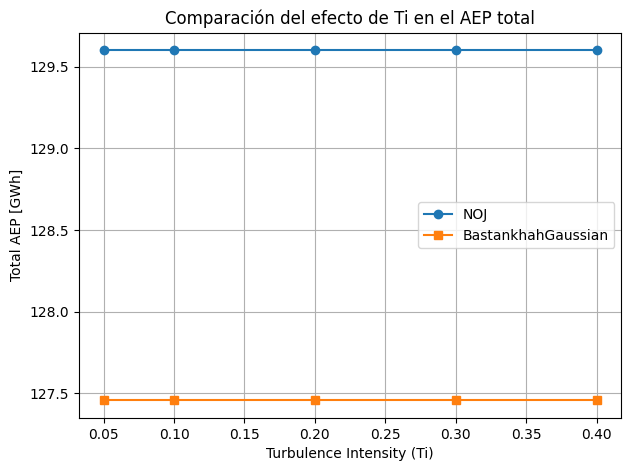

site.ti: 0.01  site attribute check -> no attr
NOJ aep sum [GWh]: 129.60184377356433
Gaussian aep sum [GWh]: 127.45742645279482
NOJ sum over wd (AEP vs ws): [ 0.          0.56109233  1.67593719  3.58459672  6.33435162  9.74216457
 13.37385076 16.43748143]
GAUS sum over wd (AEP vs ws): [ 0.          0.5464974   1.6346574   3.50257914  6.19817297  9.5420629
 13.10931584 16.10214302]
------
site.ti: 0.1  site attribute check -> no attr


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')


NOJ aep sum [GWh]: 129.60184377356433
Gaussian aep sum [GWh]: 127.45742645279482
NOJ sum over wd (AEP vs ws): [ 0.          0.56109233  1.67593719  3.58459672  6.33435162  9.74216457
 13.37385076 16.43748143]
GAUS sum over wd (AEP vs ws): [ 0.          0.5464974   1.6346574   3.50257914  6.19817297  9.5420629
 13.10931584 16.10214302]
------
site.ti: 0.8  site attribute check -> no attr
NOJ aep sum [GWh]: 129.60184377356433
Gaussian aep sum [GWh]: 127.45742645279482
NOJ sum over wd (AEP vs ws): [ 0.          0.56109233  1.67593719  3.58459672  6.33435162  9.74216457
 13.37385076 16.43748143]
GAUS sum over wd (AEP vs ws): [ 0.          0.5464974   1.6346574   3.50257914  6.19817297  9.5420629
 13.10931584 16.10214302]
------


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\py_wake\deficit_models\gaussian.py:124: UserWarning: The BastankhahGaussian model is not representative of the setup used in the literature. For this, use py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014 instead
  DeprecatedModel.__init__(self, 'py_wake.literature.gaussian_models.Bastankhah_PorteAgel_2014')


In [146]:
import matplotlib.pyplot as plt
from py_wake.examples.data.hornsrev1 import V80
from py_wake.site._site import UniformWeibullSite
from py_wake.deficit_models.noj import NOJ
from py_wake.deficit_models.gaussian import BastankhahGaussian

# Coordenadas de tus turbinas (asegúrate de definirlas antes)
# wt16_x, wt16_y = ...

windTurbines = V80()

# Valores de turbulencia a probar
ti_values = [0.05, 0.1, 0.2, 0.3, 0.4]

results_noj = {}
results_gaussian = {}

for ti in ti_values:
    site = UniformWeibullSite(
        p_wd = [.20,.25,.35,.25],
        a = [9.176929,  9.782334,  9.531809,  9.909545],
        k = [2.392578, 2.447266, 2.412109, 2.591797],
        ti = ti
    )
    
    # --- NOJ ---
    noj = NOJ(site, windTurbines)
    sim_noj = noj(wt16_x, wt16_y)
    results_noj[ti] = sim_noj.aep()
    
    # --- BastankhahGaussian ---
    gauss = BastankhahGaussian(site, windTurbines)
    sim_gauss = gauss(wt16_x, wt16_y)
    results_gaussian[ti] = sim_gauss.aep()

# --- Graficar AEP total ---
plt.figure(figsize=(7,5))
total_noj = [results_noj[ti].sum().item() for ti in ti_values]
total_gauss = [results_gaussian[ti].sum().item() for ti in ti_values]

plt.plot(ti_values, total_noj, marker='o', label="NOJ")
plt.plot(ti_values, total_gauss, marker='s', label="BastankhahGaussian")
plt.xlabel("Turbulence Intensity (Ti)")
plt.ylabel("Total AEP [GWh]")
plt.title("Comparación del efecto de Ti en el AEP total")
plt.legend()
plt.grid(True)

plt.show()

# --------------------------------------------------------
# DEBUG: imprimir atributos importantes y contribuciones por bins
for ti in [0.01, 0.1, 0.8]:
    site = UniformWeibullSite(
        p_wd=[.20,.25,.35,.25],
        a=[9.176929,9.782334,9.531809,9.909545],
        k=[2.392578,2.447266,2.412109,2.591797],
        ti=ti
    )
    print("site.ti:", ti, " site attribute check ->", getattr(site, 'ti', 'no attr'))
    noj = NOJ(site, windTurbines)
    sim_noj = noj(wt16_x, wt16_y)
    gauss = BastankhahGaussian(site, windTurbines)
    sim_gauss = gauss(wt16_x, wt16_y)

    # AEP contributions by wind speed and direction (inspect arrays)
    aep_noj = sim_noj.aep()
    aep_gauss = sim_gauss.aep()
    print("NOJ aep sum [GWh]:", aep_noj.sum().item())
    print("Gaussian aep sum [GWh]:", aep_gauss.sum().item())

    # imprimir algunas contribuciones por ws/wd para comparar
    print("NOJ sum over wd (AEP vs ws):", aep_noj.sum(['wt','wd']).values[:8])
    print("GAUS sum over wd (AEP vs ws):", aep_gauss.sum(['wt','wd']).values[:8])
    print("------")


Ti=0.05, k=0.0229 -> AEP total = 65.730 GWh
Ti=0.10, k=0.0420 -> AEP total = 66.283 GWh
Ti=0.30, k=0.1188 -> AEP total = 67.948 GWh


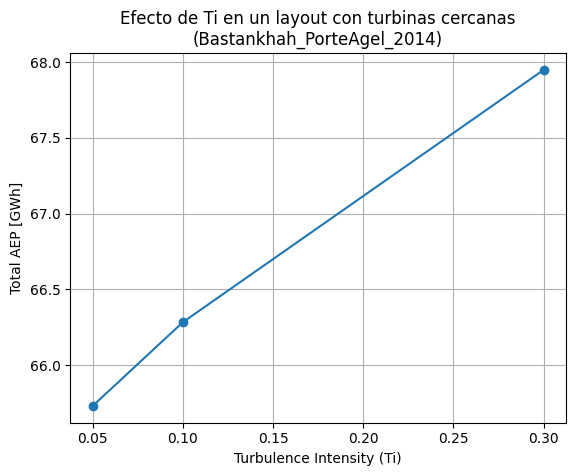

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.site._site import UniformWeibullSite
from py_wake.literature.gaussian_models import Bastankhah_PorteAgel_2014

# Configuración de sitio con Weibull y variación de Ti
def make_site(ti):
    return UniformWeibullSite(
        p_wd=[1.0],   # un solo sector para simplificar
        a=[9.0],      # escala Weibull
        k=[2.0],      # forma Weibull
        ti=ti
    )

# Relación empírica k(Ti) de Porte-Agel
def calc_k(ti):
    return 0.3837 * ti + 0.003678

# Turbina y layout: 10 turbinas en fila con poco spacing
windTurbines = V80()
n_turb = 10
spacing = 3 * windTurbines.diameter()   # spacing reducido
wt_x = np.arange(0, n_turb * spacing, spacing)
wt_y = np.zeros_like(wt_x)

# Valores de turbulencia a analizar
ti_values = [0.05, 0.1, 0.3]
aep_totals = []

for ti in ti_values:
    site = make_site(ti)
    k_val = calc_k(ti)
    wake_model = Bastankhah_PorteAgel_2014(site, windTurbines, k=k_val)
    sim_res = wake_model(wt_x, wt_y)
    aep = sim_res.aep().sum().item()
    aep_totals.append(aep)
    print(f"Ti={ti:.2f}, k={k_val:.4f} -> AEP total = {aep:.3f} GWh")

# Graficar resultados
plt.figure()
plt.plot(ti_values, aep_totals, marker='o')
plt.xlabel("Turbulence Intensity (Ti)")
plt.ylabel("Total AEP [GWh]")
plt.title("Efecto de Ti en un layout con turbinas cercanas\n(Bastankhah_PorteAgel_2014)")
plt.grid(True)
plt.show()


Ti=0.05 -> AEP total = 70.022 GWh
Ti=0.10 -> AEP total = 70.022 GWh
Ti=0.20 -> AEP total = 70.022 GWh
Ti=0.30 -> AEP total = 70.022 GWh


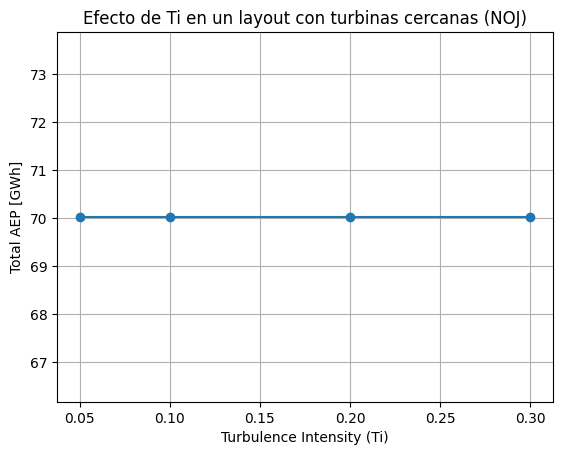

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from py_wake.site._site import UniformWeibullSite
from py_wake.deficit_models.noj import NOJ

# Configuración de sitio con diferentes niveles de turbulencia
def make_site(ti):
    return UniformWeibullSite(
        p_wd=[1.0],   # un solo sector
        a=[9.0],      # escala Weibull
        k=[2.0],      # forma Weibull
        ti=ti         # turbulencia del sitio
    )

# Turbina y layout: 10 turbinas en fila
windTurbines = V80()
n_turb = 10
spacing = 7 * windTurbines.diameter()

wt_x = np.arange(0, n_turb * spacing, spacing)
wt_y = np.zeros_like(wt_x)

# Valores de turbulencia a analizar
ti_values = [0.05, 0.1, 0.2, 0.3]
aep_totals = []

for ti in ti_values:
    site = make_site(ti)
    wake_model = NOJ(site, windTurbines)
    sim_res = wake_model(wt_x, wt_y)
    aep = sim_res.aep().sum().item()
    aep_totals.append(aep)
    print(f"Ti={ti:.2f} -> AEP total = {aep:.3f} GWh")

# Graficar resultados
plt.figure()
plt.plot(ti_values, aep_totals, marker='o')
plt.xlabel("Turbulence Intensity (Ti)")
plt.ylabel("Total AEP [GWh]")
plt.title("Efecto de Ti en un layout con turbinas cercanas (NOJ)")
plt.grid(True)
plt.show()


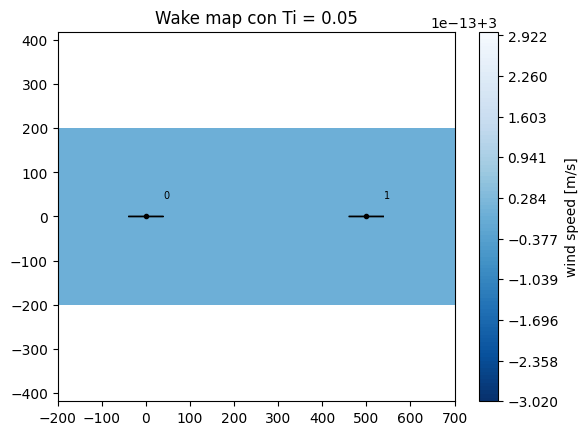

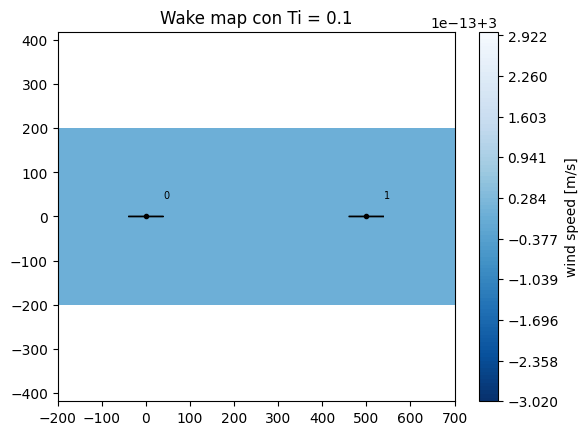

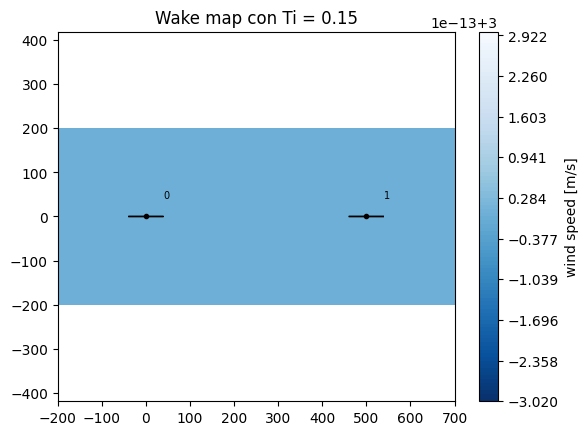

Ti = 0.05 -> AEP total = 16.79 MWh
Ti = 0.10 -> AEP total = 16.79 MWh
Ti = 0.15 -> AEP total = 16.79 MWh


In [149]:
from py_wake.site._site import UniformWeibullSite
from py_wake.examples.data.hornsrev1 import V80
from py_wake.deficit_models.noj import NOJ  # <-- usar NOJ completo
import numpy as np
import matplotlib.pyplot as plt

# Coordenadas de turbinas
x = np.array([0, 500])
y = np.array([0, 0])

# Turbinas
wt = V80()

# Sitio con Weibull discreto
site = UniformWeibullSite(
    p_wd=[.20,.25,.35,.25],
    a=[9.176929, 9.782334, 9.531809, 9.909545],
    k=[2.392578, 2.447266, 2.412109, 2.591797],
    ti=0.1
)

# Diferentes valores de turbulencia Ti
ti_values = [0.05, 0.10, 0.15]
aep_results = []

for ti in ti_values:
    site.ti = ti
    noj = NOJ(site, wt)  # <-- usar NOJ completo
    sim_res = noj(x, y)
    
    aep_results.append(sim_res.aep().sum())
    
    plt.figure()
    sim_res.flow_map().plot_wake_map()
    plt.title(f"Wake map con Ti = {ti}")
    plt.show()

for ti, aep in zip(ti_values, aep_results):
    print(f"Ti = {ti:.2f} -> AEP total = {aep:.2f} MWh")


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [151]:
# import and setup site and windTurbines
%load_ext py_wake.utils.notebook_extensions

from tqdm.notebook import tqdm
from py_wake.utils import layouts
from py_wake.utils.profiling import timeit, profileit
from py_wake.examples.data.hornsrev1 import Hornsrev1Site, V80
from py_wake.literature.gaussian_models import Bastankhah_PorteAgel_2014
from py_wake.utils.plotting import setup_plot
xr.set_options(display_expand_data=False)

site = Hornsrev1Site()
x, y = site.initial_position.T
windTurbines = V80()

wf_model = Bastankhah_PorteAgel_2014(site, windTurbines, k=0.0324555)

#this allows you to see what type of engineering models you are simulating
print(wf_model)

The py_wake.utils.notebook_extensions extension is already loaded. To reload it, use:
  %reload_ext py_wake.utils.notebook_extensions
Bastankhah_PorteAgel_2014(PropagateDownwind, BastankhahGaussianDeficit-wake, LinearSum-superposition)


In [152]:
TI = 0.7 # 10% de turbulencia

In [153]:
sim_res = wf_model(x, y,     # wind turbine positions
                   h=None,   # wind turbine heights (defaults to the heights defined in windTurbines)
                   type=0,   # Wind turbine types
                   wd=[270], ws=[8], # Wind speed
                   TI=TI
                  )


In [154]:
sim_res.aep()

<xarray.DataArray 'AEP [GWh]' (wt: 80, wd: 1, ws: 1)> Size: 640B
0.8999 0.8999 0.8999 0.8999 0.8999 0.8999 ... 0.2277 0.2277 0.2277 0.2277 0.2279
Coordinates:
  * wt       (wt) int64 640B 0 1 2 3 4 5 6 7 8 9 ... 71 72 73 74 75 76 77 78 79
  * wd       (wd) int64 8B 270
  * ws       (ws) int64 8B 8
    type     (wt) int64 640B 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    Description:  Annual energy production [GWh]

In [155]:
print('Total power: %f GWh'%sim_res.aep().sum().values)

Total power: 26.552687 GWh


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from floris import FlorisModel

fmodel = FlorisModel("gch.yaml")
x, y = fmodel.get_turbine_layout()

print("     x       y")
for _x, _y in zip(x, y):
    print(f"{_x:6.1f}, {_y:6.1f}")